## ARIMA

In [128]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df=pd.read_csv('starbucks_data.csv')


In [130]:
df.head()

,title,score,id,url,comms_num,created,body,author,subreddit
0,THEY WON THE UNION VOTE,16011,rco8xd,https://www.reddit.com/r/starbucks/comments/rc...,409,1.639076e+09,NaN,witchezbrew,starbucks
1,60 Frappuccino’s with no tip… $279,9534,p9283m,https://i.redd.it/1td7kk2ewsi71.jpg,273,1.629591e+09,NaN,Relative_Nail_3145,starbucks
2,I'm not allowed to make signs anymore.,6938,3gscwr,http://imgur.com/plwvC9P,263,1.439424e+09,NaN,DragonTwain,starbucks
3,What did you get fired for?,6579,pou8vz,https://www.reddit.com/r/starbucks/comments/po...,530,1.631725e+09,"I want to hear your stories. Me, I got the axe...",PossiblyUnhinged,starbucks
4,An inspiration to us all 🙌🏻,6348,pa07hq,https://i.redd.it/uoroeqha44j71.jpg,87,1.629727e+09,NaN,annaplatt411,starbucks


In [131]:
# Convert the 'created' column to a datetime format
df['created'] = pd.to_datetime(df['created'], unit='s')

In [132]:
# Format the 'created' column as "yyyy-mm-dd"
df['created'] = df['created'].dt.strftime('%Y-%m-%d')

In [133]:
df.head()

,title,score,id,url,comms_num,created,body,author,subreddit
0,THEY WON THE UNION VOTE,16011,rco8xd,https://www.reddit.com/r/starbucks/comments/rc...,409,2021-12-09,NaN,witchezbrew,starbucks
1,60 Frappuccino’s with no tip… $279,9534,p9283m,https://i.redd.it/1td7kk2ewsi71.jpg,273,2021-08-22,NaN,Relative_Nail_3145,starbucks
2,I'm not allowed to make signs anymore.,6938,3gscwr,http://imgur.com/plwvC9P,263,2015-08-12,NaN,DragonTwain,starbucks
3,What did you get fired for?,6579,pou8vz,https://www.reddit.com/r/starbucks/comments/po...,530,2021-09-15,"I want to hear your stories. Me, I got the axe...",PossiblyUnhinged,starbucks
4,An inspiration to us all 🙌🏻,6348,pa07hq,https://i.redd.it/uoroeqha44j71.jpg,87,2021-08-23,NaN,annaplatt411,starbucks


In [134]:
df.tail()

,title,score,id,url,comms_num,created,body,author,subreddit
992,it be like that,1563,fjuhfk,https://i.redd.it/hj2t9lpx94n41.jpg,75,2020-03-16,NaN,rnintz,starbucks
993,"Not sure which makes me happier, our raises or...",1560,x43olu,https://i.redd.it/h9ll6q6qmgl91.jpg,149,2022-09-02,NaN,rdm101020,starbucks
994,What's your favorite moment of instant karma w...,1562,v8asys,https://www.reddit.com/r/starbucks/comments/v8...,137,2022-06-09,"For me, it was when a lady complained that her...",matchawaffles,starbucks
995,These modifications are getting ridiculous🙄,1560,v0dnm5,https://i.redd.it/68nryet8pf291.jpg,56,2022-05-29,NaN,Potential_Moment6773,starbucks
996,My manager made the moment right in the best way,1561,de8wp6,https://www.reddit.com/r/starbucks/comments/de...,51,2019-10-06,A lady yelled at my manager today because her ...,StellaLuxx,starbucks


In [135]:
# Drop the 'score' and 'created' columns
df = df.drop(['title', 'id', 'url', 'comms_num', 'body', 'author', 'subreddit'], axis=1)


In [136]:
df.set_index('created', inplace=True)

In [137]:
# from sklearn.model_selection import train_test_split

In [138]:

# Convert 'created' column to datetime if not already done
# df['created'] = pd.to_datetime(df['created'])


In [139]:
# Sort the DataFrame by date (if it's not already sorted)
# df.sort_values(by='created', inplace=True)

In [140]:
# Split the data into training and testing sets
# You can adjust the test_size as needed (e.g., test_size=0.2 for an 80/20 split)
# train_size = 0.8  # 80% of the data for training, 20% for testing
# split_index = int(len(df) * train_size)

# train_data = df[:split_index]
# test_data = df[split_index:]

In [141]:

# Print the shapes of the training and testing sets
# print("Training data shape:", train_data.shape)
# print("Testing data shape:", test_data.shape)

In [142]:
df

,score
created,
2021-12-09,16011
2021-08-22,9534
2015-08-12,6938
2021-09-15,6579
2021-08-23,6348
...,...
2020-03-16,1563
2022-09-02,1560
2022-06-09,1562


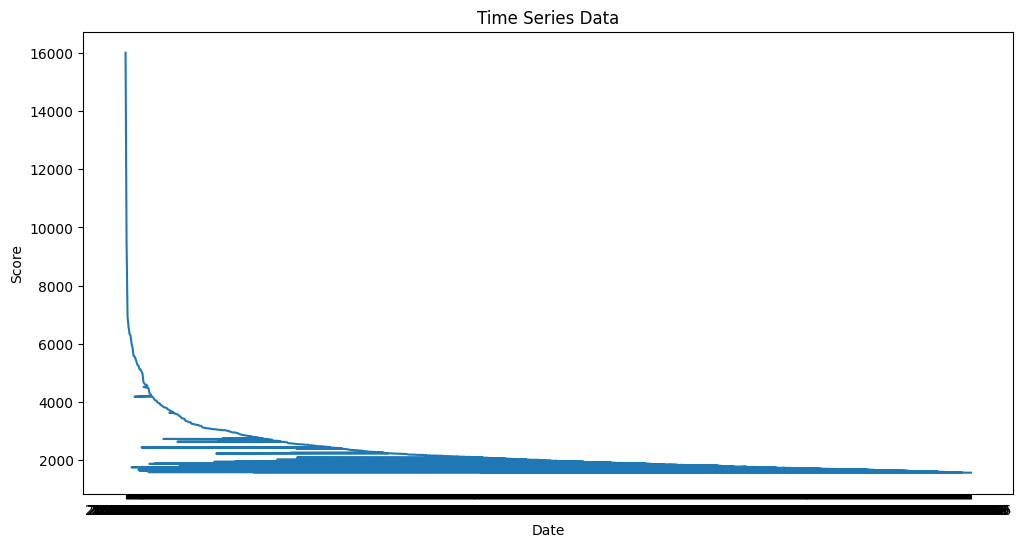

In [143]:
plt.figure(figsize=(12, 6))
plt.plot(df['score'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Score')
plt.show()

## Stationarity Check:

In [144]:
from statsmodels.tsa.stattools import adfuller

In [145]:
result = adfuller(df['score'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.557444757373775
p-value: 1.5692300423885108e-06


## Modeling:


In [146]:
# Define the ARIMA model (p, d, q)
p, d, q = 1, 1, 1
model = ARIMA(df['score'], order=(p, d, q))

# Fit the model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  score   No. Observations:                  997
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6328.766
Date:                Fri, 29 Sep 2023   AIC                          12663.532
Time:                        14:10:35   BIC                          12678.243
Sample:                             0   HQIC                         12669.124
                                - 997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9253      0.001    765.063      0.000       0.923       0.928
ma.L1          0.7073      0.010     73.178      0.000       0.688       0.726
sigma2      1.312e+04    117.064    112.086      0.0

## Plot Residuals:

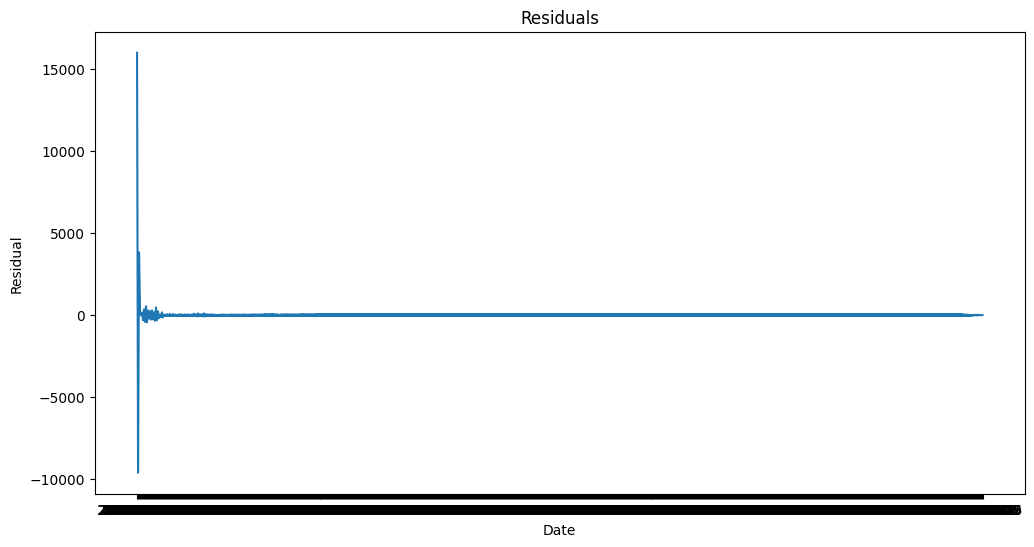

In [147]:
residuals = pd.Series(model_fit.resid, index=df.index)
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()


## Forecasting

In [148]:
# Number of future periods to forecast
forecast_periods = 10
forecast = model_fit.get_forecast(steps=forecast_periods)

# Get the forecasted values and their confidence intervals
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Print the forecasted values and confidence intervals
print("Forecasted Values:")
print(forecast_values)
print("\nConfidence Intervals:")
print(forecast_ci)


Forecasted Values:
997     1565.707135
998     1570.062623
999     1574.092732
1000    1577.821770
1001    1581.272230
1002    1584.464921
1003    1587.419102
1004    1590.152590
1005    1592.681871
1006    1595.022202
Name: predicted_mean, dtype: float64

Confidence Intervals:
      lower score  upper score
997   1341.196504  1790.217767
998    937.820318  2202.304927
999    449.383694  2698.801770
1000   -99.225341  3254.868882
1001  -691.774742  3854.319201
1002 -1316.857023  4485.786866
1003 -1966.012611  5140.850815
1004 -2632.746660  5813.051839
1005 -3311.955879  6497.319621
1006 -3999.566161  7189.610565


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
